### TASK 1 (Data Importing and Exploration)

- a) Import the required Python libraries.

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

- b) Import the input dataset for the analysis.

In [5]:
df = pd.read_csv("DS1_C9_S4_Practice_HR_Data.csv")


- c) Observe the shape and structure of the dataset.

In [7]:
print(df.shape)
df.head()

(14999, 10)


,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### TASK 2 (Data Exploration and Visualization)

- a) Determine if the satisfaction level is higher for the employees who are with the company or for those who have left the company.

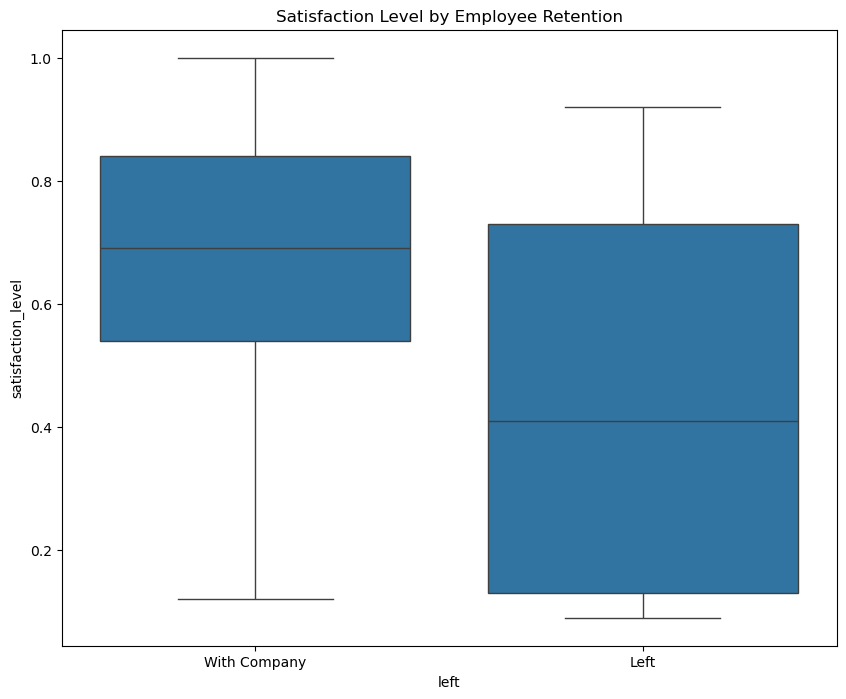

In [10]:
plt.figure(figsize=(10,8))
sns.boxplot(x = "left",y = "satisfaction_level", data = df)
plt.title('Satisfaction Level by Employee Retention')
plt.xticks([0, 1], ['With Company', 'Left'])
plt.show()

***** Interpretation: By comparing the two boxplots it is very evident that the median satisfaction level for employees who are "With Company" is significantly higher than for those who have "left".

- b) Determine if the average monthly hours is higher for the employees who are working with the company or for those who have left the company.

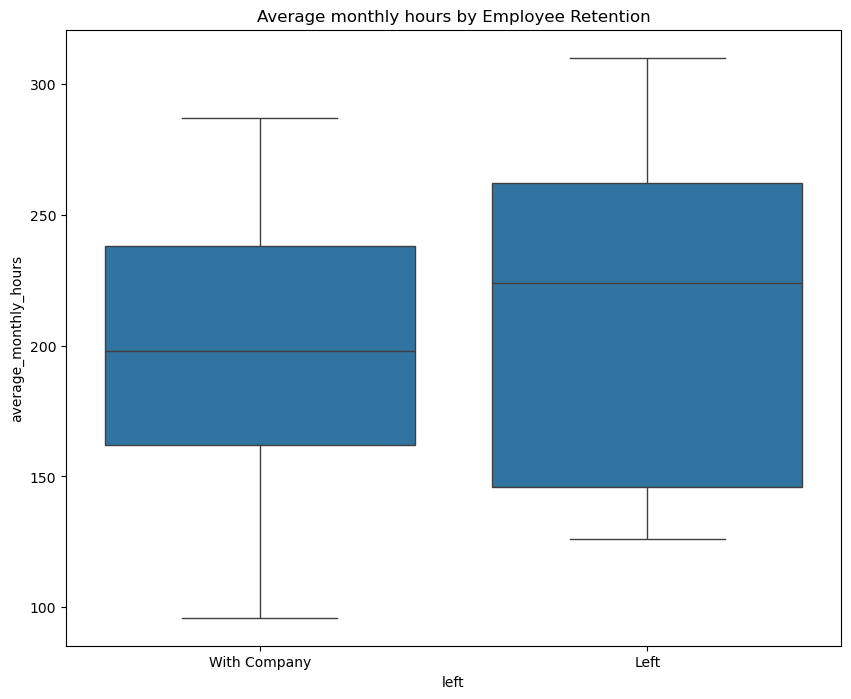

In [13]:
plt.figure(figsize=(10,8))
sns.boxplot(x = "left",y = "average_monthly_hours", data = df)
plt.title('Average monthly hours by Employee Retention')
plt.xticks([0, 1], ['With Company', 'Left'])
plt.show()

***** Interpretation: By comparing the two boxplots, we can observe that the median average monthly hours for employees who have "left" the company is higher than those who are still with the company.

- c) Identify relation between the salary and the employee retention in the company and display it using an appropriate graph.

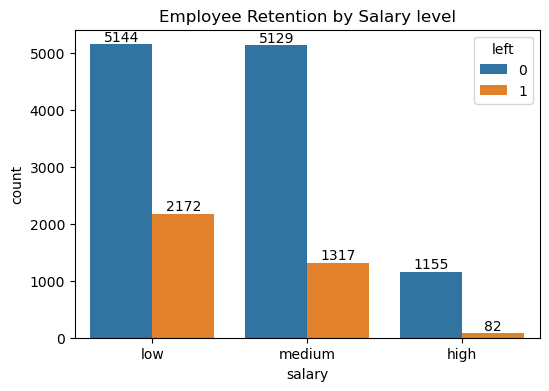

In [16]:
plt.figure(figsize=(6,4))
ax = sns.countplot(x = "salary", hue = "left", data = df)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Employee Retention by Salary level")
plt.show()

***** Interpretation:
1) Employees with low and medium salaries have a higher tendency to leave the company.
2) Employees with high salaries have a significantly lower tendency to leave the company.

- d) Find the department wise retention rate.

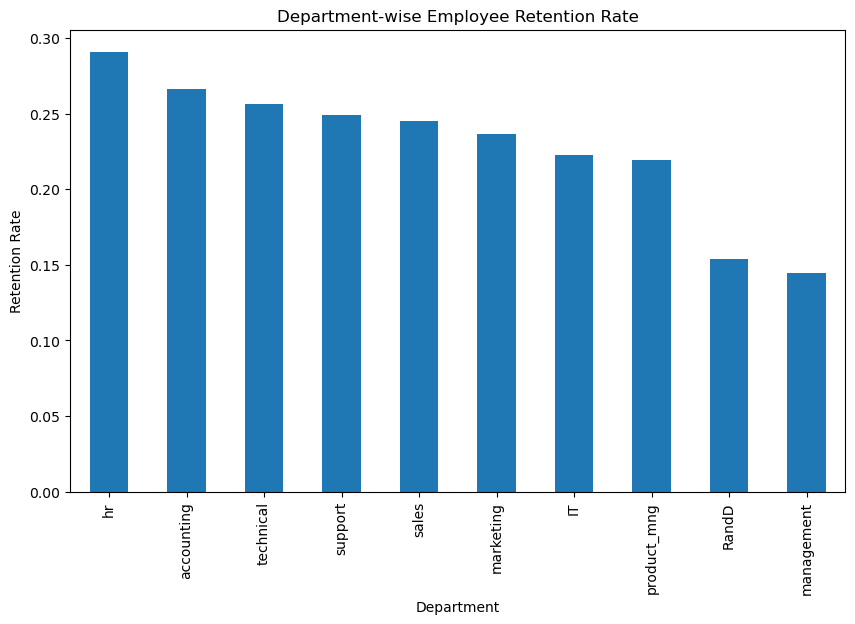

In [19]:
department_retention = df.groupby('Department')['left'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
department_retention.plot(kind='bar')
plt.title('Department-wise Employee Retention Rate')
plt.xlabel('Department')
plt.ylabel('Retention Rate')
plt.show()

***** Interpretation:
1) HR department has the highest retention rate, that means the employees of the HR department stayed with the company.
2) Accounting, Technical, Support, Sales, Marketing, IT, and Product_mng also has a high retention rate.
3) R and D , Management have the worst retention rate among all other department.

### TASK 3 (Data Preprocessing)

- a) Data preparation: The "Salary" and "Department" columns contain text data. Convert the text data into numerical data for analysis using machine learning.

In [23]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["salary"] = le.fit_transform(df["salary"])
df["Department"] = le.fit_transform(df["Department"])

# Printing the first 5 rows to verify.
print(df.head())

   satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
1                0.80             0.86               5                    262   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   

   time_spend_company  Work_accident  left  promotion_last_5years  Department  \
0                   3              0     1                      0           7   
1                   6              0     1                      0           7   
2                   4              0     1                      0           7   
3                   5              0     1                      0           7   
4                   3              0     1                      0           7   

   salary  
0       1  
1 

- b) Perform missing value treatment, if required.

In [25]:
df.isnull().sum() # There are no null values in the dataset.

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

- c) Perform outlier assessment and treatment (if required).

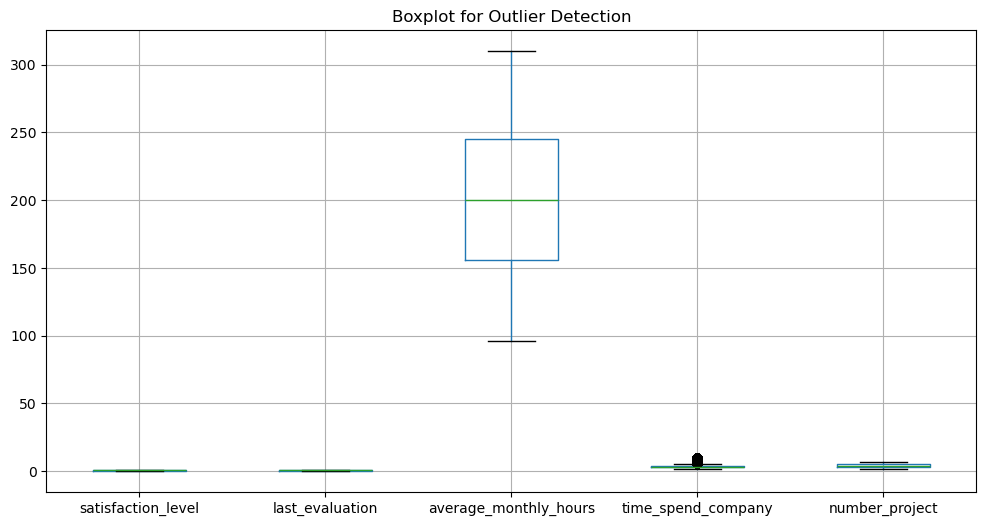

In [27]:
plt.figure(figsize=(12, 6))
df.boxplot(column=['satisfaction_level', 'last_evaluation', 'average_monthly_hours', 'time_spend_company', 'number_project'])
plt.title('Boxplot for Outlier Detection')
plt.show()

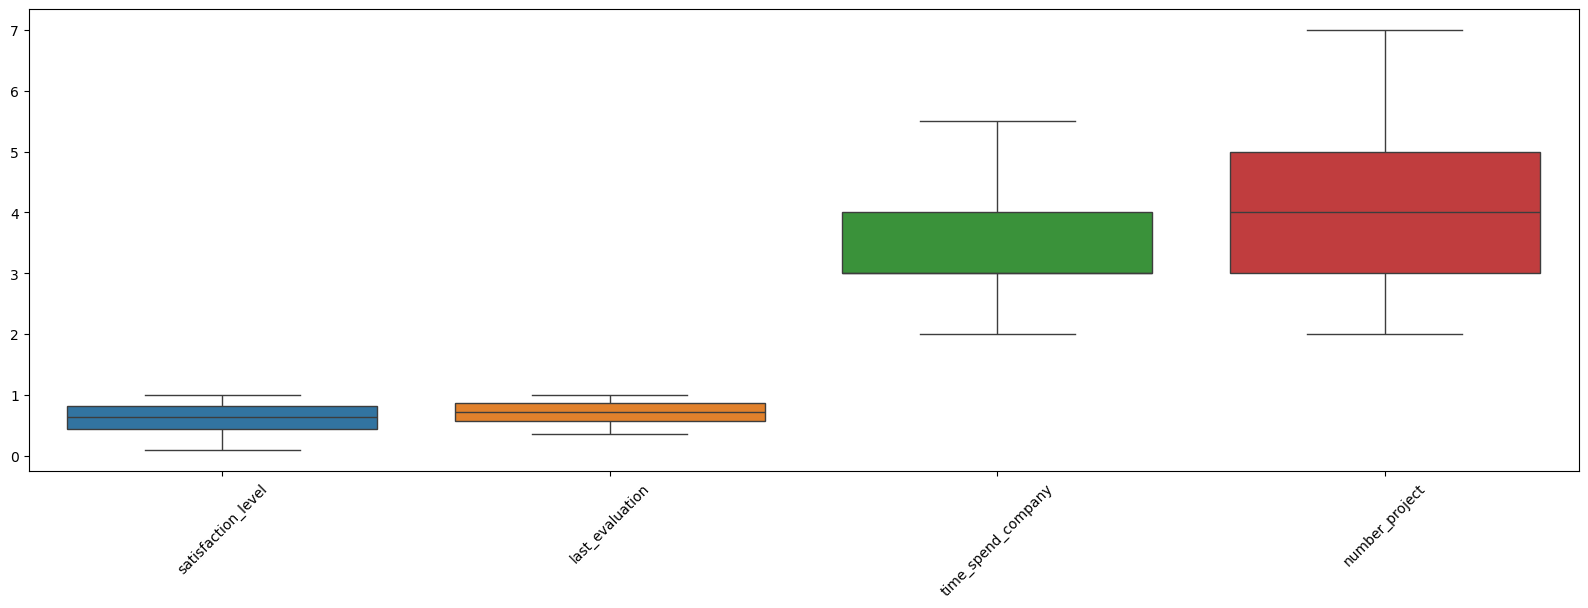

In [28]:
cols = ["satisfaction_level", "last_evaluation","time_spend_company","number_project"]
for col in cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] > upper, upper, np.where(df[col] < lower, lower, df[col]))


sns.boxplot(data = df[cols])
plt.gcf().set_size_inches(20,6)
plt.xticks(rotation = 45)
plt.show()

***** As we can see that the outliers have been treated using the iqr_winsorization method.

- d) Perform data scaling of independent features.

In [31]:
scaler = StandardScaler()
features = ['satisfaction_level', 'last_evaluation', 'number_project', 'average_monthly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years']
df[features] = scaler.fit_transform(df[features])

- e) Select features through checking multicollinearity among independent features.

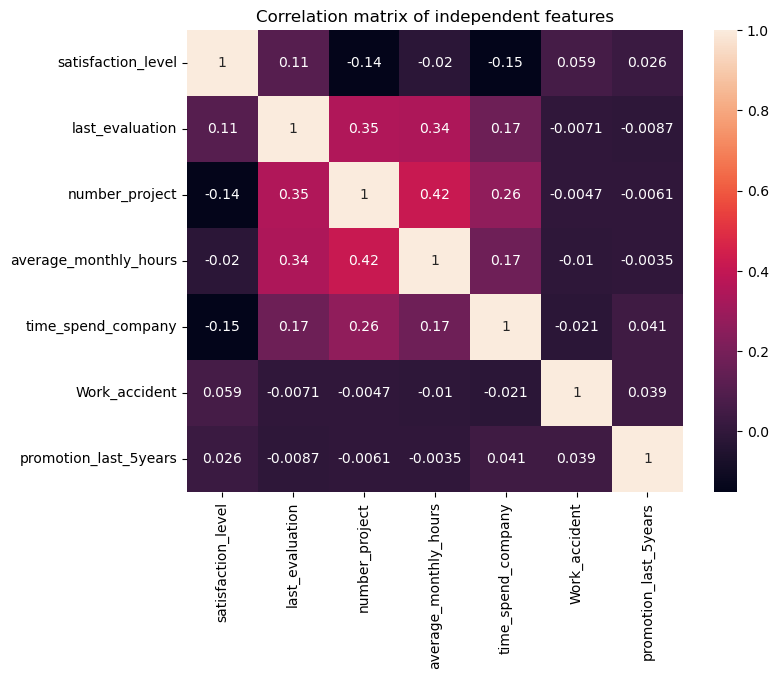

In [33]:
plt.figure(figsize=(8,6))
sns.heatmap(df[features].corr(), annot = True)
plt.title("Correlation matrix of independent features")
plt.show()

### TASK 4 (Modelling - Logistic Regression)

- a) Split the data into train and test sets.
- b) Logistic Regression: Train the model and predict the outcome for test data. Calculate the accuracy of the training dataset.
  * For prediction, consider the "left" column of the data as the dependent variable.

In [36]:
X = df.drop("left", axis = 1)
y = df["left"]
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [37]:
model = LogisticRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
accuracy = model.score(X_test,y_test)
print("Accuracy:", accuracy)

Accuracy: 0.7483333333333333


### TASK 5 (Performance Evaluation)

- a) Confusion matrix: Calculate Recall, F1-score, and Precision.

In [40]:
from sklearn.metrics import accuracy_score, recall_score,f1_score,precision_score
from sklearn.metrics import confusion_matrix

In [41]:

print(f"Accuracy score: {accuracy_score(y_test,y_pred)}")
print(f"Recall score: {recall_score(y_test, y_pred)}")
print(f"F1 score: {f1_score(y_test, y_pred)}")
print(f"Precision score: {precision_score(y_test,y_pred)}")

conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion matrix: {conf_matrix}")

Accuracy score: 0.7483333333333333
Recall score: 0.23796033994334279
F1 score: 0.307974335472044
Precision score: 0.43636363636363634
Confusion matrix: [[2077  217]
 [ 538  168]]


- b) Calculate ROC and AUC score and plot the curves.

In [43]:
from sklearn.metrics import roc_auc_score

In [44]:
roc=roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
print("ROC_AUC_Score:", roc)

ROC_AUC_Score: 0.8367190182048996


<Figure size 1000x800 with 0 Axes>

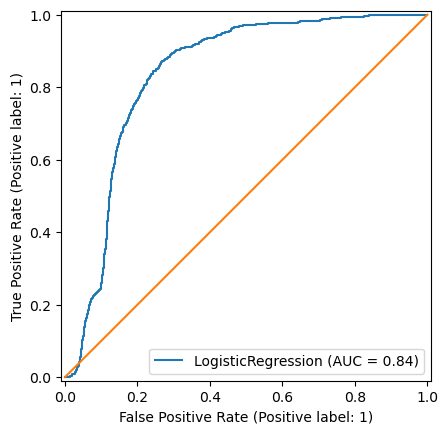

In [45]:
from sklearn.metrics import RocCurveDisplay

plt.figure(figsize=(10,8))
RocCurveDisplay.from_estimator(model, X_test, y_test)
plt.plot([0,1],[0,1])
plt.show()

#### Overall Interpretation:

The model, a Logistic Regression, demonstrates a mixed performance.

Strengths:

The ROC AUC score of 0.84 is quite good, indicating that the model has a strong discriminative power, meaning it can generally distinguish between positive and negative classes effectively across various thresholds. The ROC curve visually confirms this, being well above the random classifier line.
The model performs well in identifying True Negatives, as shown by the high number of 2077 TNs in the confusion matrix.
Weaknesses:

Despite a good AUC, the model suffers from low Recall (0.238) and a relatively low F1-score (0.308). This is the most critical issue. It means the model is failing to identify a large proportion of actual positive cases (538 False Negatives).

The Precision (0.436) is also moderate, indicating that almost half of the times the model predicts a positive, it is incorrect.

The Accuracy (0.748), while seemingly decent, can be misleading in cases of imbalanced datasets (which is likely given the high number of TNs compared to TPs). A model that predicts everything as negative would also have a high accuracy if negative cases are dominant, but it would be useless for identifying positives.

In summary, while the model shows good overall discriminatory power as indicated by the high AUC, its current configuration, judging by the low recall and F1-score, is not effective at identifying positive instances. This suggests that the chosen threshold for classification might be too high, or there might be an inherent difficulty in distinguishing positive cases with the current features and model. Further tuning of the classification threshold or exploring feature engineering and different model architectures would be beneficial to improve the recall and F1-score without significantly sacrificing precision.